# 1. Loading and analyzing the cars dataset

This project uses the car dataset published by https://archive.ics.uci.edu/ml/datasets/automobile

The goal in this project is to analyze and impute missign data of the cars datset and then to build a linear regression model for predicting car prices

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#reading txt file

with open('automobile.txt') as f:
    contents = f.read()
    print(contents)

1. Title: 1985 Auto Imports Database

2. Source Information:
   -- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
   -- Date: 19 May 1987
   -- Sources:
     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037

3. Past Usage:
   -- Kibler,~D., Aha,~D.~W., \& Albert,~M. (1989).  Instance-based prediction
      of real-valued attributes.  {\it Computational Intelligence}, {\it 5},
      51--57.
	 -- Predicted price of car using all numeric and Boolean attributes
	 -- Method: an instance-based learning (IBL) algorithm derived from a
	    localized k-nearest neighbor algorithm.  Compared with a
	    linear regression prediction...so all instances
	    with missing attribute values were discarded.  This res

Here we have the description of columns, type and the exact number of missing data. 

I will define columns for my cars dataset using columns above

In [3]:
#defining columns
col=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',\
     'engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders',\
'engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',\
     'highway-mpg','price']

In [4]:
#loading dataset
cars=pd.read_csv('automobile.csv',names=col)
cars.head(2)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   

  highway-mpg  price  
0          27  13495  
1          27  16500  

[2 rows x 26 columns]

In [5]:
#Checking for datatypes
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

We can see that some variables should have been numerical, but I will change the data type only after I replace '?' with appropriate values. For dats imputation I will use comparison and averaging. 

But before I start to analyze missing values I will remove colums that will not be important for our regression model

Irrelevant columns: 

-engine location,wheel base,length, width,height, curb weight,bore(the inner diameter of the cylinder),stroke(the distance within the cylinder the piston travels), compression-ratio(the ratio between the volume of the cylinder and combustion chamber in an internal combustion engine at their maximum and minimum )


This project will be completed through following steps:

2.removing irrelevant columns and imputing the missing ('?') data

3.changing the datatype where needed and checking for possible collinearity between numerical columns

4.performing encoding of categorical variables and scaling numerical features

5.training and testing linear model 

6.evaluation

7.further considerations

# 2. Removing irrelevant columns and imputing the missing ('?') data

In [6]:
#defining new columns
col=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system','horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price']

cars=cars[col]
cars.head(1)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   

    body-style drive-wheels engine-type num-of-cylinders  engine-size  \
0  convertible          rwd        dohc             four          130   

  fuel-system horsepower peak-rpm  city-mpg  highway-mpg  price  
0        mpfi        111     5000        21           27  13495

Among those columns that I've kept there are some that have the missing values:'normalized-losses','num-of-doors', 'horsepower', 'peak-rpm' and 'price'.

By comparing some of the properties I found out that the normalized-loss depends to some extent on symboling, body style, num of doors and make. I will utilize those columns to find missing values for the normalized loss. 

In case that there are no cars with the same properties I will impute values with the average value for cars that have same symboling value and some common properties 

In the following lines I will demonstrate startegy on one example and the rest will be performed in the same way

In [7]:
#there are no 4 doors sedans with symboling -3 and -2. 
cars[(cars['symboling']==-1)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(5)

symboling normalized-losses num-of-doors body-style           make
67          -1                93         four      sedan  mercedes-benz
70          -1                93         four      sedan  mercedes-benz
71          -1                 ?         four      sedan  mercedes-benz
88          -1               137         four      sedan     mitsubishi
173         -1                65         four      sedan         toyota

In [8]:
#I will impute normalized - loss for merceds-Benz with 93

cars.at[71,'normalized-losses']=93

In [9]:
cars[(cars['symboling']==0)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(100)

symboling normalized-losses num-of-doors body-style           make
11           0               192         four      sedan            bmw
13           0               188         four      sedan            bmw
15           0                 ?         four      sedan            bmw
17           0                 ?         four      sedan            bmw
20           0                81         four      sedan      chevrolet
35           0               110         four      sedan          honda
39           0                85         four      sedan          honda
40           0                85         four      sedan          honda
41           0                85         four      sedan          honda
43           0                 ?         four      sedan          isuzu
45           0                 ?         four      sedan          isuzu
47           0               145         four      sedan         jaguar
48           0                 ?         four      sedan         jaguar
60           0               115         four      sedan          mazda
62           0               115         four      sedan          mazda
65           0               118         four      sedan          mazda
66           0                 ?         four      sedan          mazda
73           0                 ?         four      sedan  mercedes-benz
100          0               106         four      sedan         nissan
101          0               128         four      sedan         nissan
103          0               108         four      sedan         nissan
107          0               161         four      sedan         peugot
108          0               161         four      sedan         peugot
111          0               161         four      sedan         peugot
112          0               161         four      sedan         peugot
115          0               161         four      sedan         peugot
116          0               161         four      sedan         peugot
117          0               161         four      sedan         peugot
141          0               102         four      sedan         subaru
142          0               102         four      sedan         subaru
143          0               102         four      sedan         subaru
144          0               102         four      sedan         subaru
145          0               102         four      sedan         subaru
156          0                91         four      sedan         toyota
158          0                91         four      sedan         toyota
160          0                91         four      sedan         toyota
162          0                91         four      sedan         toyota
191          0                 ?         four      sedan     volkswagen
192          0                 ?         four      sedan     volkswagen

In [10]:
#imputing valuyes for bmw, jaguar and mazda using the values from the table
cars.at[15,'normalized-losses']=188
cars.at[17,'normalized-losses']=188

cars.at[48,'normalized-losses']=145

cars.at[66,'normalized-losses']=116.5 #averaging values from the table

In [11]:
#still cant impute values for mercedes benz,iszu and wolkswagen. I will check other values for symboling

cars[(cars['symboling']==1)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

symboling normalized-losses num-of-doors body-style        make
6            1               158         four      sedan        audi
8            1               158         four      sedan        audi
14           1                 ?         four      sedan         bmw
25           1               148         four      sedan       dodge
26           1               148         four      sedan       dodge
53           1               113         four      sedan       mazda
54           1               113         four      sedan       mazda
85           1               125         four      sedan  mitsubishi
86           1               125         four      sedan  mitsubishi
87           1               125         four      sedan  mitsubishi
92           1               122         four      sedan      nissan
96           1               122         four      sedan      nissan
121          1               154         four      sedan    plymouth
122          1               154         four      sedan    plymouth

In [12]:
cars[(cars['symboling']==2)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

symboling normalized-losses num-of-doors body-style        make
3            2               164         four      sedan        audi
4            2               164         four      sedan        audi
133          2               104         four      sedan        saab
135          2               104         four      sedan        saab
137          2               104         four      sedan        saab
184          2                94         four      sedan  volkswagen
185          2                94         four      sedan  volkswagen
186          2                94         four      sedan  volkswagen
187          2                94         four      sedan  volkswagen
188          2                94         four      sedan  volkswagen

I am missing a value for bmw too now, but  I can see that volkswagen with symboling 2 has normalized-loss value of 94, so I will assign value of 90 to volkswagen with symboling 0 (as 0 means safer)

In [13]:
cars.at[191,'normalized-losses']=90
cars.at[192,'normalized-losses']=90

In [14]:
#Now I will repeat the procedure for cars with two doors and all values of symboling
cars[(cars['symboling']==0)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

# imputing bmw with 188
cars.at[16,'normalized-losses']=188

#jaguar is still missing

cars[(cars['make']=='jaguar')][['symboling','normalized-losses','num-of-doors','body-style','make']]

#imputing value for jaguar at 145
cars.at[49,'normalized-losses']=145

cars[(cars['symboling']==1)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

cars[(cars['symboling']==2)&(cars['body-style']=='sedan')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#still missing isuzu and audi

cars[(cars['make']=='audi')][['symboling','normalized-losses','num-of-doors','body-style','make']]

#imputing audi with value 164
cars.at[5,'normalized-losses']=164

cars[cars['make']=='isuzu'][['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#replacing missing vaklue for isuzu with possible values fro symboling 1 and 2
cars.at[43,'normalized-losses']=100
cars.at[44,'normalized-losses']=110
cars.at[45,'normalized-losses']=100

cars[(cars['symboling']==1)&(cars['body-style']=='hatchback')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

#missing values will be imputed with the average value for  hatchback, 2 seats, symboling 1

cars.at[2,'normalized-losses']=118
cars.at[75,'normalized-losses']=118
cars.at[129,'normalized-losses']=118

cars[(cars['symboling']==2)&(cars['body-style']=='hatchback')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

#missing hatchback, 2 seaters, symboling 2 - takign the average
cars.at[46,'normalized-losses']=127
cars.at[131,'normalized-losses']=127

cars[(cars['symboling']==3)&(cars['body-style']=='hatchback')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

#imputing mitsubishi values using the table value

cars.at[82,'normalized-losses']=153
cars.at[83,'normalized-losses']=153
cars.at[84,'normalized-losses']=153

cars[(cars['symboling']==0)&(cars['body-style']=='hatchback')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

#missing hatchback, 2 seaters, symboling 0 and takign the average
cars.at[9,'normalized-losses']=106

cars[(cars['symboling']==3)&(cars['body-style']=='hardtop')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

cars[(cars['symboling']==1)&(cars['body-style']=='hardtop')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

#3 more missing mercedes and porsche. I will impute mercedes with 100 bcs the similar mercedes with symboling 0 is 93
cars[(cars['make']=='mercedes-benz')&(cars['body-style']=='hardtop')&(cars['num-of-doors']=='two')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

cars.at[74,'normalized-losses']=100

cars[(cars['symboling']==3)][['symboling','normalized-losses','num-of-doors','body-style','make']].head(40)

#for other missing values with symboling 3, as they're either conveertible or hardtop I will take the value of 142,
# that was 2 seater, convertible mercedes-benz

cars.at[0,'normalized-losses']=142
cars.at[1,'normalized-losses']=142
cars.at[128,'normalized-losses']=142
cars.at[189,'normalized-losses']=142

cars.at[126,'normalized-losses']=142
cars.at[127,'normalized-losses']=142

#for plymuth I will taker the average value for hatchback, 2 seaters
cars[(cars['make']=='plymouth')][['symboling','normalized-losses','num-of-doors','body-style','make']].head(20)

cars.at[124,'normalized-losses']= 163

#moving to wagons
cars[(cars['symboling']==0)&(cars['body-style']=='wagon')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#imputing missing values with the avearge
cars.at[109,'normalized-losses']=87
cars.at[110,'normalized-losses']=87
cars.at[113,'normalized-losses']=87
cars.at[114,'normalized-losses']=87
cars.at[130,'normalized-losses']=87
cars.at[193,'normalized-losses']=87

cars[(cars['symboling']==1)&(cars['body-style']=='wagon')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#imputing missing value for audi
cars.at[7,'normalized-losses']=103

cars[cars['normalized-losses']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make']]

cars[(cars['symboling']==-1)&(cars['body-style']=='wagon')&(cars['num-of-doors']=='four')]\
[['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#replacing missing value for toyota  with the average 
cars.at[181,'normalized-losses']=83

cars[cars['make']=='mercedes-benz'][['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

cars.at[73,'normalized-losses']=93

cars[cars['make']=='bmw'][['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#replacing missing value for bmw with the median between normalized loss values for symboling 0 and 2

cars.at[14,'normalized-losses']=190

cars[cars['make']=='mazda'][['symboling','normalized-losses','num-of-doors','body-style','make']].head(50)

#normalized loss for mazda
cars.at[63,'normalized-losses']=115

cars[cars['normalized-losses']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make']]

cars[(cars['symboling']==0)&(cars['num-of-doors']=='two')][['symboling','normalized-losses','num-of-doors','body-style','make']]



#Imputing values for 'no-of-doors','horsepower','peak-rpm','price'

cars[cars['make']=='dodge'][['symboling','normalized-losses','num-of-doors','body-style','make']]

#sedan dodge has 4 doors
cars.at[27,'num-of-doors']='four'

cars[cars['num-of-doors']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make']]

cars[cars['make']=='mazda'][['symboling','normalized-losses','num-of-doors','body-style','make']]

#sedan mazda has four doors
cars.at[63,'num-of-doors']='four'

#we are supposed to have 2 missing values for hoursepower 
cars[cars['horsepower']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make','horsepower']]

cars[cars['make']=='renault']

#as I have only 2 ranault cars and they boith have missing values I will google values for horsepower and peak rpm
cars.at[130,'horsepower']=115
cars.at[131,'horsepower']=100


cars[cars['peak-rpm']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make','peak-rpm']]

cars[cars['body-style']=='wagon'][['symboling','normalized-losses','num-of-doors','body-style','make','peak-rpm']]

cars.at[130,'peak-rpm']=5000

cars[cars['body-style']=='hatchback'][['symboling','normalized-losses','num-of-doors','body-style','make','peak-rpm']]

cars.at[131,'peak-rpm']=5000

cars[cars['price']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make','peak-rpm','price']]
cars[cars['price']=='?'][['symboling','normalized-losses','num-of-doors','body-style','make','peak-rpm','price']]

cars[cars['body-style']=='sedan'][['symboling','normalized-losses','num-of-doors','body-style','make','price']][20:25]

#for isuzu I have the price
cars.at[44,'price']=6785
cars.at[45,'price']=6785

cars[cars['make']=='audi'][['symboling','normalized-losses','num-of-doors','body-style','make','price']]

#I will match the price with 2 door sedan
cars.at[9,'price']=15250

cars[cars['make']=='porsche'][['symboling','normalized-losses','num-of-doors','body-style','make','price']]

#and m,issing price for porsche from the table
cars.at[129,'price']=22018

cars[(cars.values.ravel()=='?').reshape(cars.shape).any(1)]

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-type, num-of-cylinders, engine-size, fuel-system, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

No more '?' values. Now, let's change type of data

# 3. Changing the datatype where needed and checking for possible collinearity between numerical columns

In [15]:
#turn into integers
for x in ['normalized-losses','horsepower', 'peak-rpm','price']:
    cars[x]=cars[x].astype(int)

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    int64 
 1   normalized-losses  205 non-null    int64 
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-type        205 non-null    object
 9   num-of-cylinders   205 non-null    object
 10  engine-size        205 non-null    int64 
 11  fuel-system        205 non-null    object
 12  horsepower         205 non-null    int64 
 13  peak-rpm           205 non-null    int64 
 14  city-mpg           205 non-null    int64 
 15  highway-mpg        205 non-null    int64 
 16  price              205 non-null    int64 
dt

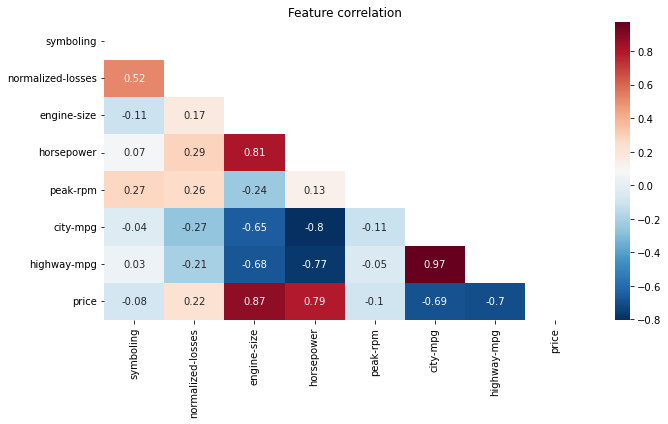

In [17]:
#checking the correlation between numerical columns
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature correlation')
shape=np.triu(cars.corr())
sns.heatmap(cars.corr(),annot=cars.corr().round(2),mask=shape,cmap='RdBu_r')
plt.tight_layout()
plt.show()

Lookign ast the corraltion matrix I can see that the engine-size is highly colrelated with the horsepower of the car which is logical, so I will keep only one of these two features- the "horsepower".

Also city mpg and highway mpg are highly correlated. I will choose "highway mpg" as a feature because I think that it affects the price of the car more than "city mpg" (at least in the US as you can get  to the most destinations using highways. The situation might have been different in Europe...)

In [18]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

I will also drop the "num-of-doors" because that information is often hidden in the style of the car (sedan, wagon, convertible). I will check categorical varibales vs. price through boxplots in order to see if the price differs based on the category within the feature

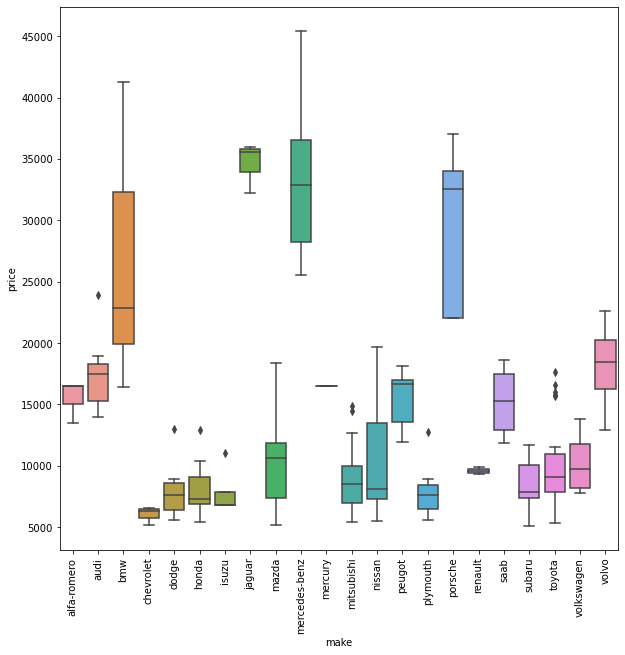

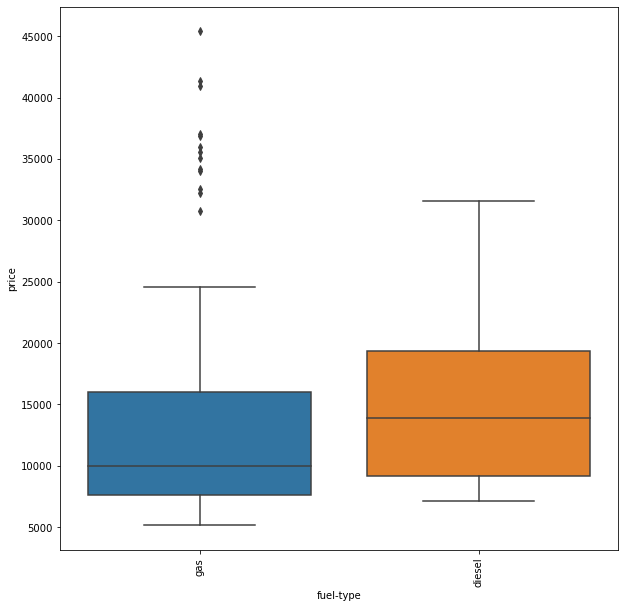

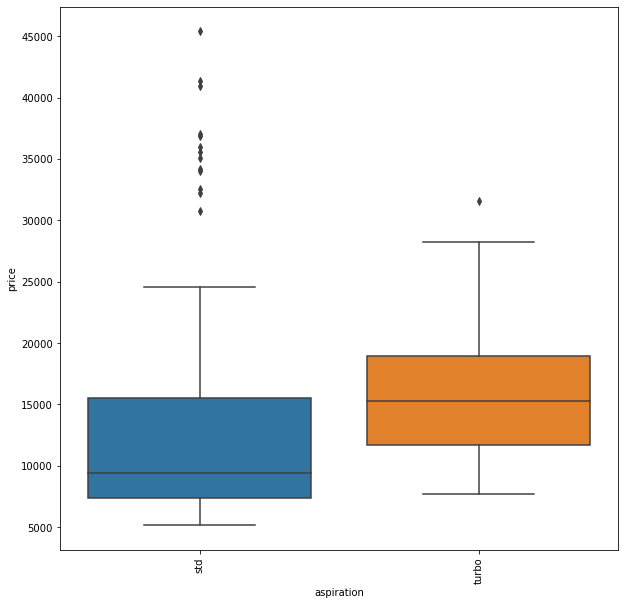

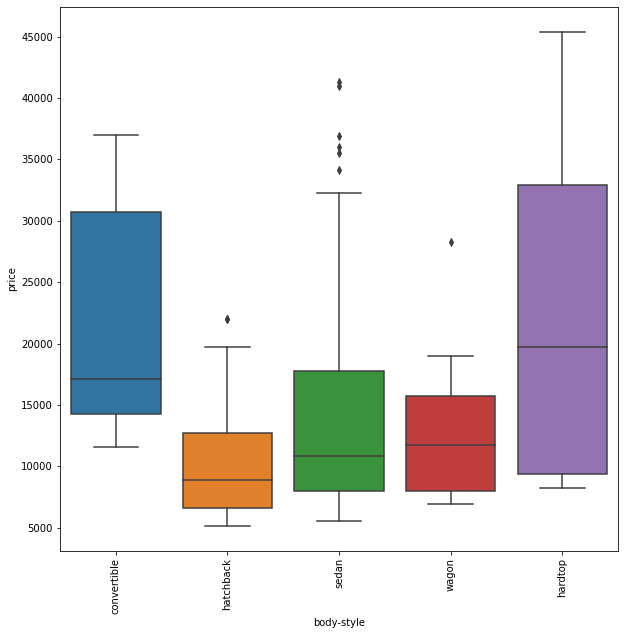

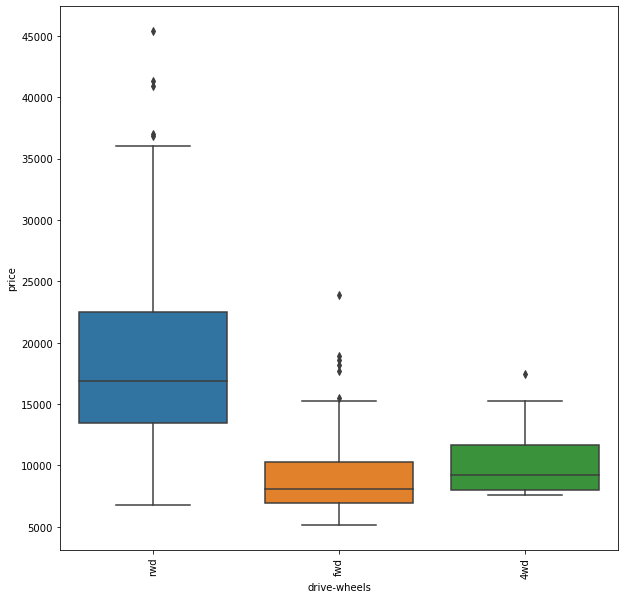

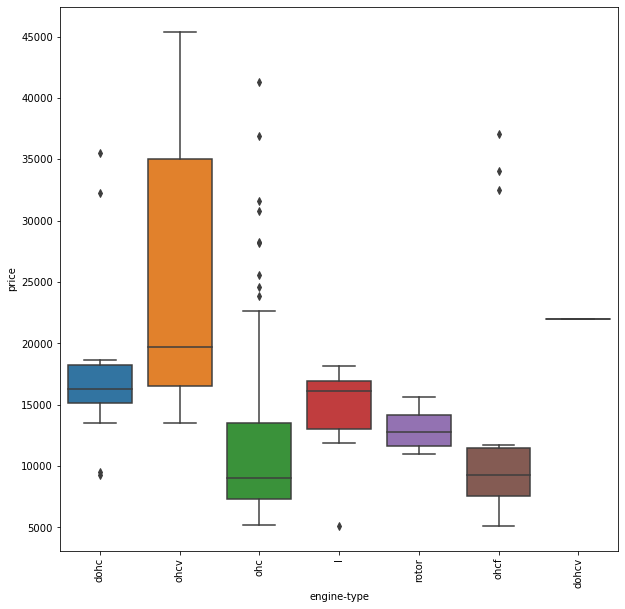

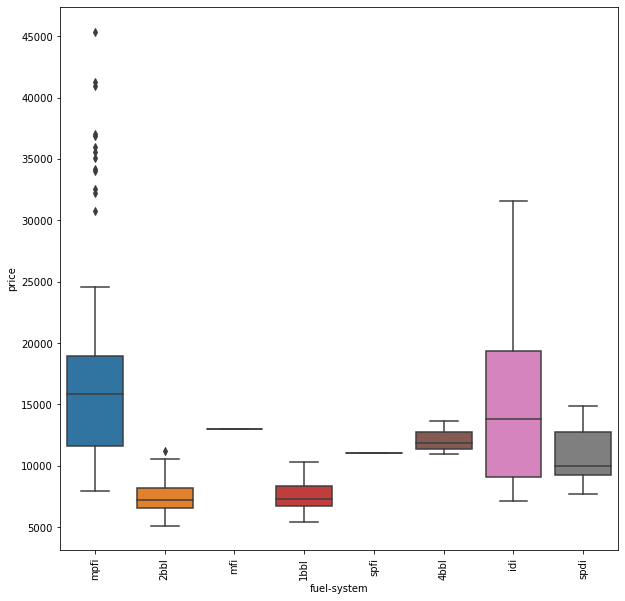

In [19]:
#defining categorical fetures
categor=['make','fuel-type','aspiration','body-style','drive-wheels','engine-type','fuel-system']

for c in categor:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=cars,x=c,y='price')
    plt.xticks(rotation=90)
    plt.show()

In all of the boxplots above I can see that the porice varies between different categories within a single feature. 

Fuel-type doesn't really seem to affect the price much but I will keep this property because I think that the diesel cards are more expensive than those running on petrol

In [20]:
#I will now rearange columns so all the categorical columns are in the front and numerical in the back

cars=cars[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels','num-of-cylinders',
           'symboling', 'normalized-losses', 'engine-size', 'peak-rpm', 'highway-mpg', 'price']]

# 4. Performing encoding of categorical variables and scaling numerical features

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
#initiating OneHotEncoder
onehotencoder = OneHotEncoder()
transformed= onehotencoder.fit_transform(cars.iloc[:,0:6]).toarray()

In [23]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   make               205 non-null    object
 1   fuel-type          205 non-null    object
 2   aspiration         205 non-null    object
 3   body-style         205 non-null    object
 4   drive-wheels       205 non-null    object
 5   num-of-cylinders   205 non-null    object
 6   symboling          205 non-null    int64 
 7   normalized-losses  205 non-null    int64 
 8   engine-size        205 non-null    int64 
 9   peak-rpm           205 non-null    int64 
 10  highway-mpg        205 non-null    int64 
 11  price              205 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 19.3+ KB


In [24]:
#after OneHotEncoder I got an array , so I need to chancge it to dataframe
encod=pd.DataFrame(transformed,index=cars.index)

In [25]:
#concatening new encoded features with the numerical ones
cars_encoded=pd.concat([encod,cars.iloc[:,6:]],axis=1)

# 5. Training and testing linear model 

In [26]:
X=cars_encoded.iloc[:,:-1].values
y=cars_encoded.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
X_train.shape,y_train.shape

((164, 46), (164,))

In [29]:
#scaling data 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 41:] = sc.fit_transform(X_train[:, 41:])#do not apply sc to encoded data bcs theyre already btw 0,1
X_test[:, 41:] = sc.transform(X_test[:, 41:]) #we would also loose information about original variables (country)

In [30]:
X_train.shape,X_test.shape

((164, 46), (41, 46))

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [32]:
y_pred.astype(int)

array([ 5230,  6070,  5762,  6281, 10301, 31143,  5989,  1173,  5755,
       11394, 17162, 15567, 16014,  9667, 13986, 12446,  9522,  7732,
       16037, 11104,  9462,  7290, 18692,  8556, 11896,  7732, 13312,
        7796,  5419,  8707,  7868,  9876, 30317, 10864, 17306,  7811,
        9824, 35549, 13161, 18502,  6261])

In [33]:
#evalueaing results
from sklearn.metrics import r2_score

print(f'The train r-squared score is {r2_score(y_train,lr.predict(X_train))}')
print(f'The teast r-squared score is {r2_score(y_test,y_pred)}')     

The train r-squared score is 0.9450452806083576
The teast r-squared score is 0.8908060074224585


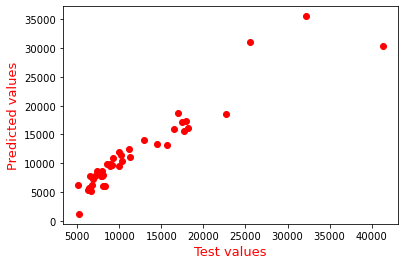

In [34]:
#visualizing test results
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Test values',size=13,color='red')
plt.ylabel('Predicted values',size=13,color='red')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'{(mean_absolute_percentage_error(y_test,y_pred)*100).round(1)}%')

13.0%


# 6. Evaluation

The train and test result gave a high value of r- squared which means that 94% and 89% of variations in the price of the car can be explained trough variations in independent features, respectively.

The average percentage error on the test set is 13% of the car price. 

If we look at the scatter plot above we can see few very distant points. Those are high luxury cars so some of their features and prices may look as outliers and they're not.


# 7. Further considerations

It is maybe important to mention that 4 missing values from our dataset were actually the dependant variables .When performing the missing value imputation I did imupte those values too taking the average of the prices.

With or without those values the coefficient of determination of my model is almost the same.

However, it is important to aknowledge this. If there were more missing values we would have thougth of the correct approach. Imputing many missing values could lead to the data leakage on one hand and on the other hand imputed values do not cary any valuable information. Something worth of discussion. 